# 1. Setup

## 1.1 Install Dependencies

In [1]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.20.0rc0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## 1.2 Import Dependencies

In [5]:
# Import standard dependencies

import os   
import random
import numpy as np
from matplotlib import pyplot as plt


In [6]:
# Import standard dependencies
import cv2
import os   
import random
import numpy as np
from matplotlib import pyplot as plt


In [7]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [8]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU Growth

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [10]:
# Setup paths
import os
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [11]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [12]:
# http://vis-www.cs.umass.edu/lfw/

In [13]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

tar: Error opening archive: Failed to open 'lfw.tgz'


In [14]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=1, download_if_missing=True)


In [16]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=1, download_if_missing=True)


In [17]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=1, download_if_missing=True)


In [18]:
import os

LFW_PATH = 'lfw-deepfunneled'

# Check if lfw exists
if not os.path.exists(LFW_PATH):
    print("Folder 'lfw' not found. Please download it or check the path.")
else:
    for directory in os.listdir(LFW_PATH):
        for file in os.listdir(os.path.join(LFW_PATH, directory)):
            EX_PATH = os.path.join(LFW_PATH, directory, file)
            NEW_PATH = os.path.join(NEG_PATH, file)
            os.replace(EX_PATH, NEW_PATH)


Folder 'lfw' not found. Please download it or check the path.


In [19]:
pip install lfw

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lfw (from versions: none)
ERROR: No matching distribution found for lfw


In [20]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw-deepfunneled'):
    for file in os.listdir(os.path.join('lfw-deepfunneled', directory)):
        EX_PATH = os.path.join('lfw-deepfuneled', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw-deepfunneled'

## 2.2 Collect Positive and Anchor Classes

In [21]:
# Import uuid library to generate unique image names
import uuid

In [22]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\700fba20-6d77-11f0-8330-ba2358a892e2.jpg'

In [23]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(4)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

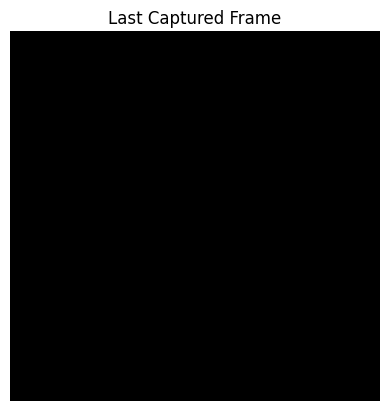

In [24]:
# Establish a connection to the webcam
import cv2
import uuid
import os
import matplotlib.pyplot as plt

# Make sure these paths exist
ANC_PATH = os.path.join('data', 'anchor')
POS_PATH = os.path.join('data', 'positive')

# Create folders if needed
os.makedirs(ANC_PATH, exist_ok=True)
os.makedirs(POS_PATH, exist_ok=True)

cap = cv2.VideoCapture(0)  # Use 0 unless your webcam is on index 4

last_frame = None  # Initialize

while cap.isOpened(): 
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Crop to 250x250
    frame = frame[120:120+250, 200:200+250, :]
    
    last_frame = frame.copy()  # Save a copy for later

    # Save anchor if 'a' is pressed
    if cv2.waitKey(1) & 0xFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    # Save positive if 'p' is pressed
    if cv2.waitKey(1) & 0xFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    # Display the frame
    cv2.imshow('Image Collection', frame)

    # Break on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Show the last captured frame with matplotlib
if last_frame is not None:
    last_frame_rgb = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
    plt.imshow(last_frame_rgb)
    plt.title("Last Captured Frame")
    plt.axis("off")
    plt.show()
else:
    print("No frame captured.")





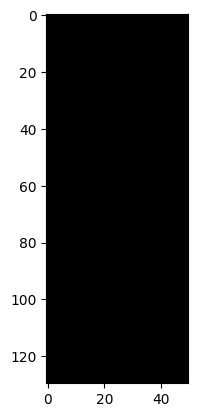

In [25]:
plt.imshow(frame[120:120+250,200:200+250, :])

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [26]:
import os
import glob

NEG_PATH = os.path.join('data', 'negative')  # Define NEG_PATH if not already

# Print path and check for files
print("NEG_PATH:", NEG_PATH)
neg_files = glob.glob(os.path.join(NEG_PATH, '*.jpg'))
print("Found", len(neg_files), "negative image(s)")

# Optional: print a few file names
print(neg_files[:5])


NEG_PATH: data\negative
Found 3 negative image(s)
['data\\negative\\neg_0.jpg', 'data\\negative\\neg_1.jpg', 'data\\negative\\sample_negative.jpg']


In [27]:
import requests
import os

NEG_PATH = os.path.join('data', 'negative')
os.makedirs(NEG_PATH, exist_ok=True)

urls = [
    "https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg",
    "https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg"
]

for i, url in enumerate(urls):
    img_data = requests.get(url).content
    with open(os.path.join(NEG_PATH, f"neg_{i}.jpg"), 'wb') as f:
        f.write(img_data)

print("Sample images downloaded.")


Sample images downloaded.


In [28]:
import os
import glob

NEG_PATH = os.path.join('data', 'negative')  # Define NEG_PATH if not already

# Print path and check for files
print("NEG_PATH:", NEG_PATH)
neg_files = glob.glob(os.path.join(NEG_PATH, '*.jpg'))
print("Found", len(neg_files), "negative image(s)")

# Optional: print a few file names
print(neg_files[:5])


NEG_PATH: data\negative
Found 3 negative image(s)
['data\\negative\\neg_0.jpg', 'data\\negative\\neg_1.jpg', 'data\\negative\\sample_negative.jpg']


In [29]:
import os
print("Anchor folder:", ANC_PATH, "Files:", len(os.listdir(ANC_PATH)))
print("Positive folder:", POS_PATH, "Files:", len(os.listdir(POS_PATH)))
print("Negative folder:", NEG_PATH, "Files:", len(os.listdir(NEG_PATH)))


Anchor folder: data\anchor Files: 7
Positive folder: data\positive Files: 3
Negative folder: data\negative Files: 3


In [30]:
import os

POS_PATH = os.path.join('data', 'positive')
print("Does path exist?", os.path.exists(POS_PATH))
print("Files in data/positive:", os.listdir(POS_PATH))


Does path exist? True
Files in data/positive: ['9c3c7d87-6ad0-11f0-9689-ba2358a892e2.jpg', 'd71b6a85-6ad0-11f0-8045-ba2358a892e2.jpg', 'sample_positive.jpg']


In [31]:
anchor = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(300)
positive = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(300)
negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(300)


In [32]:
import os
import tensorflow as tf

# Define paths
ANC_PATH = os.path.join('data', 'anchor')
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')

# Load datasets using forward slashes
anchor = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(300)
positive = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(300)
negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(300)


In [33]:
import shutil

# LFW dataset must be downloaded in a folder called 'lfw'
for directory in os.listdir('lfw-deepfunneled'):
    dir_path = os.path.join('lfw-deepfunneled', directory)
    for file in os.listdir(dir_path):
        src = os.path.join(dir_path, file)
        dst = os.path.join(NEG_PATH, file)
        shutil.move(src, dst)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw-deepfunneled'

In [ ]:
import glob

neg_images = glob.glob(os.path.join(NEG_PATH, '*.jpg'))
if len(neg_images) == 0:
    print("❌ No negative images found.")
else:
    negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(300)
    print("✅ Loaded", len(neg_images), "negative images.")


✅ Loaded 3 negative images.


In [ ]:
try:
    negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(300)
except tf.errors.InvalidArgumentError as e:
    print("❌ Error loading negative dataset:", e)
    negative = None


In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'data\\anchor\\752524ba-6b16-11f0-96c7-ba2358a892e2.jpg'


## 3.2 Preprocessing - Scale and Resize

In [ ]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [ ]:
img = preprocess("C:\\Users\\ASUS\\venv\\data\\anchor\\77f30a57-6b16-11f0-92e0-ba2358a892e2.jpg")

In [ ]:
import os
print(os.path.exists('data/anchor/a4e73462-135f-11ec-9e6e-a0cec8d2d278.jpg'))


False


In [ ]:
import os
import urllib.request

# Create folders if they don't exist
os.makedirs('data/anchor', exist_ok=True)
os.makedirs('data/positive', exist_ok=True)
os.makedirs('data/negative', exist_ok=True)

# Sample image URLs
image_urls = [
    ("data/anchor/sample_anchor.jpg", "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"),
    ("data/positive/sample_positive.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Shaki_waterfall.jpg/800px-Shaki_waterfall.jpg"),
    ("data/negative/sample_negative.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Fronalpstock_big.jpg/800px-Fronalpstock_big.jpg")
]

# Download and save
for path, url in image_urls:
    urllib.request.urlretrieve(url, path)

print("Images downloaded and saved in appropriate folders.")


Images downloaded and saved in appropriate folders.


In [ ]:
import os

print(os.listdir('data/anchor'))


['74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', '74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', '74f2a688-6b16-11f0-af33-ba2358a892e2.jpg', '74f7ce50-6b16-11f0-8669-ba2358a892e2.jpg', '752524ba-6b16-11f0-96c7-ba2358a892e2.jpg', '75411605-6b16-11f0-859c-ba2358a892e2.jpg', '754610ad-6b16-11f0-86b9-ba2358a892e2.jpg', '7557f42a-6b16-11f0-b8fd-ba2358a892e2.jpg', '756a4c4b-6b16-11f0-9b12-ba2358a892e2.jpg', '758145e8-6b16-11f0-ba96-ba2358a892e2.jpg', '75860d4e-6b16-11f0-874b-ba2358a892e2.jpg', '75a19a1a-6b16-11f0-a245-ba2358a892e2.jpg', '75af654f-6b16-11f0-a8bf-ba2358a892e2.jpg', '75b3d22f-6b16-11f0-9f17-ba2358a892e2.jpg', '75b88f78-6b16-11f0-b314-ba2358a892e2.jpg', '75d988ad-6b16-11f0-b1d5-ba2358a892e2.jpg', '75e64cc9-6b16-11f0-aee2-ba2358a892e2.jpg', '75eb5fa7-6b16-11f0-9999-ba2358a892e2.jpg', '760c81f7-6b16-11f0-b03d-ba2358a892e2.jpg', '76193a8f-6b16-11f0-9be5-ba2358a892e2.jpg', '762d8d2c-6b16-11f0-af80-ba2358a892e2.jpg', '764757ee-6b16-11f0-b49e-ba2358a892e2.jpg', '765fb69a-6b16-11f0-a802-ba2358

In [ ]:
img = preprocess('C:\\Users\\ASUS\\venv\\data\\anchor\\7740eead-6b16-11f0-8b5d-ba2358a892e2.jpg')
img = preprocess('C:\\Users\\ASUS\\venv\\data\\anchor\\77d78af9-6b16-11f0-b922-ba2358a892e2.jpg')
img = preprocess('data/anchor/sample_anchor.jpg')


In [ ]:
img.numpy().max() 

np.float32(1.0)

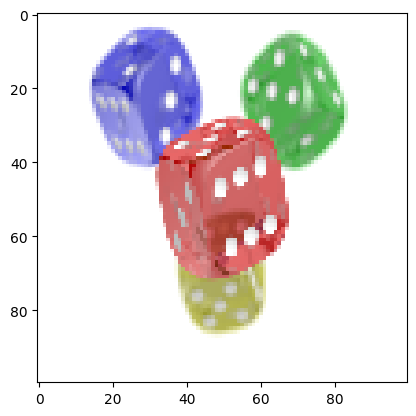

In [ ]:
plt.imshow(img)

In [ ]:
def preprocess(file_path):
    # Read the image from path
    byte_img = tf.io.read_file(file_path)

    # Decode JPEG
    img = tf.io.decode_jpeg(byte_img)

    # Resize to fixed shape
    img = tf.image.resize(img, (100, 100))

    # Normalize (Optional)
    img = img / 255.0

    return img


In [ ]:
dataset = tf.data.Dataset.list_files("data/anchor/*.jpg").map(preprocess)


In [ ]:
import tensorflow as tf
import os

# Path setup
ANC_PATH = os.path.join('data', 'anchor')

# Define preprocess function
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img

# Load dataset and apply preprocess
anchor = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(10)
anchor = anchor.map(preprocess)


In [ ]:
dataset = anchor.map(preprocess)


TypeError: in user code:

    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_14216\222247085.py", line 9, in preprocess  *
        byte_img = tf.io.read_file(file_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


In [ ]:
dataset.map(preprocess)

TypeError: in user code:

    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_20596\222247085.py", line 9, in preprocess  *
        byte_img = tf.io.read_file(file_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


## 3.3 Create Labelled Dataset

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
exampple = samples.next()

In [ ]:
exampple

(array([[[0.34313726, 0.34705883, 0.32352942],
         [0.34411764, 0.3480392 , 0.32254902],
         [0.3465686 , 0.35049018, 0.325     ],
         ...,
         [0.89509803, 0.89509803, 0.8872549 ],
         [0.8980392 , 0.9009804 , 0.8843137 ],
         [0.9019608 , 0.90588236, 0.8862745 ]],
 
        [[0.33848038, 0.34338236, 0.32083333],
         [0.34779412, 0.35367647, 0.32769608],
         [0.35686275, 0.3627451 , 0.3367647 ],
         ...,
         [0.8963235 , 0.89730394, 0.8865196 ],
         [0.89411765, 0.8980392 , 0.8784314 ],
         [0.8980392 , 0.9019608 , 0.88235295]],
 
        [[0.32818627, 0.3360294 , 0.31642157],
         [0.33553922, 0.34730393, 0.31985295],
         [0.34534314, 0.35710785, 0.32965687],
         ...,
         [0.89485294, 0.8980392 , 0.8806372 ],
         [0.8980392 , 0.9019608 , 0.88235295],
         [0.8980392 , 0.9019608 , 0.88235295]],
 
        ...,
 
        [[0.35539216, 0.35931373, 0.3365196 ],
         [0.35049018, 0.35833332, 0.31519

## 3.4 Build Train and Test Partition

In [ ]:
positives = tf.data.Dataset.zip((anchor_files, positive_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_files)))))


In [ ]:
# Get number of samples from anchor dataset
anchor_count = anchor_files.cardinality().numpy()

# Create labeled pairs
positives = tf.data.Dataset.zip((anchor_files, positive_files,
                                 tf.data.Dataset.from_tensor_slices(tf.ones(anchor_count))))
negatives = tf.data.Dataset.zip((anchor_files, negative_files,
                                 tf.data.Dataset.from_tensor_slices(tf.zeros(anchor_count))))


In [ ]:
anchor_file_list = list(tf.io.gfile.glob(ANCHOR_PATH + '/*.jpg'))
anchor_count = len(anchor_file_list)


In [ ]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_image(byte_img, channels=3)  # force RGB
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img


In [ ]:
anchor = anchor_files.take(300).map(preprocess).cache()
positive = positive_files.take(300).map(preprocess).cache()
negative = negative_files.take(300).map(preprocess).cache()


In [ ]:
import tensorflow as tf
import os
import random

# Set up paths
ANCHOR_PATH = 'data/anchor'
POSITIVE_PATH = 'data/positive'
NEGATIVE_PATH = 'data/negative'

# Load image file paths
anchor_files = tf.data.Dataset.list_files(os.path.join(ANCHOR_PATH, '*.jpg'), shuffle=False)
positive_files = tf.data.Dataset.list_files(os.path.join(POSITIVE_PATH, '*.jpg'), shuffle=False)
negative_files = tf.data.Dataset.list_files(os.path.join(NEGATIVE_PATH, '*.jpg'), shuffle=False)

# Shuffle them for randomness
anchor_files = anchor_files.shuffle(1000, reshuffle_each_iteration=False)
positive_files = positive_files.shuffle(1000, reshuffle_each_iteration=False)
negative_files = negative_files.shuffle(1000, reshuffle_each_iteration=False)

# Create labeled pairs
# (anchor, positive, 1) --> same person
# (anchor, negative, 0) --> different person
positives = tf.data.Dataset.zip((anchor_files, positive_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_files)))))
negatives = tf.data.Dataset.zip((anchor_files, negative_files, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_files)))))

# Combine them
data = positives.concatenate(negatives)

# Preprocessing function
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0  # Normalize
    return img

# Preprocess twin pair
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

# Map preprocessing to dataset
data = data.map(preprocess_twin)

# Cache, shuffle, batch and prefetch
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

# Split into train and test
total_batches = len(list(data))
train_size = int(0.7 * total_batches)
train_data = data.take(train_size)
test_data = data.skip(train_size)

print(f"✅ Train Batches: {train_size}")
print(f"✅ Test Batches: {total_batches - train_size}")


✅ Train Batches: 0
✅ Test Batches: 1


In [ ]:
total_batches = len(list(data))


In [ ]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
def preprocess(file_path):
    if isinstance(file_path, tf.Tensor):  # Already a tensor, do not read again
        img = file_path
    else:
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
    
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img



In [ ]:
# Example: Get one batch from a dataset named `data`
example = next(iter(data))

print(type(example))
print(len(example))
for i, item in enumerate(example):
    print(f"Item {i} shape: {item.shape}")


<class 'tuple'>
3
Item 0 shape: (9, 100, 100, 3)
Item 1 shape: (9, 100, 100, 3)
Item 2 shape: (9,)


In [ ]:
print(type(example))
print(len(example))
for i, item in enumerate(example):
    print(f"Item {i} shape:", item.shape)


<class 'tuple'>
3
Item 0 shape: (9, 100, 100, 3)
Item 1 shape: (9, 100, 100, 3)
Item 2 shape: (9,)


In [ ]:
print(type(example))
print(len(example))
for i, item in enumerate(example):
    print(f"Item {i}: Type = {type(item)}, Value = {item}")


<class 'tuple'>
3
Item 0: Type = <class 'tensorflow.python.framework.ops.EagerTensor'>, Value = [[[[0.5414216  0.54534316 0.49044117]
   [0.54632354 0.5502451  0.4894608 ]
   [0.54534316 0.55220586 0.5002451 ]
   ...
   [0.72156864 0.7490196  0.78382355]
   [0.7411765  0.76862746 0.8063725 ]
   [0.7490196  0.7764706  0.81421566]]

  [[0.5421569  0.54509807 0.49215686]
   [0.53406864 0.5382353  0.48333332]
   [0.54093134 0.5480392  0.49607843]
   ...
   [0.7026961  0.73333335 0.7465686 ]
   [0.71862745 0.7477941  0.76593137]
   [0.7267157  0.7629902  0.7796569 ]]

  [[0.54289216 0.54289216 0.49583334]
   [0.53995097 0.5448529  0.48995098]
   [0.54019606 0.5480392  0.49387255]
   ...
   [0.6911765  0.71593136 0.720098  ]
   [0.7002451  0.7294118  0.7379902 ]
   [0.7129902  0.7463235  0.75416666]]

  ...

  [[0.3625     0.36642158 0.34681374]
   [0.36397058 0.36789215 0.34730393]
   [0.35392156 0.35784313 0.33431372]
   ...
   [0.1877451  0.1877451  0.1877451 ]
   [0.1757353  0.1757353  0

In [ ]:
def preprocess(file_path):
    # If already a tensor (image already loaded), skip reading from file
    if isinstance(file_path, tf.Tensor) and file_path.dtype != tf.string:
        img = file_path
    else:
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)

    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img


In [ ]:
import os

print(os.path.exists('data/anchor/a1.jpg'))       # Should be True
print(os.path.exists('data/positive/p2.jpg'))     # Should be True


False
False


In [ ]:
example = ('99838cf0-6ad0-11f0-afd2-ba2358a892e2.jpg', 'd5574a86-6ad0-11f0-a0ed-ba2358a892e2.jpg')


In [ ]:
import glob
print(glob.glob('data/anchor/*.jpg'))
print(glob.glob('data/positive/*.jpg'))


['data/anchor\\74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', 'data/anchor\\74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', 'data/anchor\\74f2a688-6b16-11f0-af33-ba2358a892e2.jpg', 'data/anchor\\74f7ce50-6b16-11f0-8669-ba2358a892e2.jpg', 'data/anchor\\752524ba-6b16-11f0-96c7-ba2358a892e2.jpg', 'data/anchor\\75411605-6b16-11f0-859c-ba2358a892e2.jpg', 'data/anchor\\754610ad-6b16-11f0-86b9-ba2358a892e2.jpg', 'data/anchor\\7557f42a-6b16-11f0-b8fd-ba2358a892e2.jpg', 'data/anchor\\756a4c4b-6b16-11f0-9b12-ba2358a892e2.jpg', 'data/anchor\\758145e8-6b16-11f0-ba96-ba2358a892e2.jpg', 'data/anchor\\75860d4e-6b16-11f0-874b-ba2358a892e2.jpg', 'data/anchor\\75a19a1a-6b16-11f0-a245-ba2358a892e2.jpg', 'data/anchor\\75af654f-6b16-11f0-a8bf-ba2358a892e2.jpg', 'data/anchor\\75b3d22f-6b16-11f0-9f17-ba2358a892e2.jpg', 'data/anchor\\75b88f78-6b16-11f0-b314-ba2358a892e2.jpg', 'data/anchor\\75d988ad-6b16-11f0-b1d5-ba2358a892e2.jpg', 'data/anchor\\75e64cc9-6b16-11f0-aee2-ba2358a892e2.jpg', 'data/anchor\\75eb5fa7-6b16-11

In [ ]:
import os
def preprocess(file_path):
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    # Proceed with reading and processing


In [ ]:
import glob
print(glob.glob('data/anchor/*.jpg'))
print(glob.glob('data/positive/*.jpg'))
print(glob.glob('data/negative/*.jpg'))


['data/anchor\\74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', 'data/anchor\\74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', 'data/anchor\\74f2a688-6b16-11f0-af33-ba2358a892e2.jpg', 'data/anchor\\74f7ce50-6b16-11f0-8669-ba2358a892e2.jpg', 'data/anchor\\752524ba-6b16-11f0-96c7-ba2358a892e2.jpg', 'data/anchor\\75411605-6b16-11f0-859c-ba2358a892e2.jpg', 'data/anchor\\754610ad-6b16-11f0-86b9-ba2358a892e2.jpg', 'data/anchor\\7557f42a-6b16-11f0-b8fd-ba2358a892e2.jpg', 'data/anchor\\756a4c4b-6b16-11f0-9b12-ba2358a892e2.jpg', 'data/anchor\\758145e8-6b16-11f0-ba96-ba2358a892e2.jpg', 'data/anchor\\75860d4e-6b16-11f0-874b-ba2358a892e2.jpg', 'data/anchor\\75a19a1a-6b16-11f0-a245-ba2358a892e2.jpg', 'data/anchor\\75af654f-6b16-11f0-a8bf-ba2358a892e2.jpg', 'data/anchor\\75b3d22f-6b16-11f0-9f17-ba2358a892e2.jpg', 'data/anchor\\75b88f78-6b16-11f0-b314-ba2358a892e2.jpg', 'data/anchor\\75d988ad-6b16-11f0-b1d5-ba2358a892e2.jpg', 'data/anchor\\75e64cc9-6b16-11f0-aee2-ba2358a892e2.jpg', 'data/anchor\\75eb5fa7-6b16-11

In [ ]:
example = ('data/anchor/99838cf0-6ad0-11f0-afd2-ba2358a892e2.jpg', 'data/positive/\\9c3c7d87-6ad0-11f0-9689-ba2358a892e2.jpg', 1.0)



In [ ]:
file_path = 'data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg'  # or any valid image path
print("Attempting to load:", file_path)


Attempting to load: data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg


In [ ]:
def debug_file_path(file_path):
    print("Attempting to load:", file_path)

debug_file_path('data/anchor/sample.jpg')


Attempting to load: data/anchor/sample.jpg


In [ ]:
print("Attempting to load:", file_path)
file_path


Attempting to load: data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg


'data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg'

In [ ]:
import os

print("Sample from anchor folder:")
print(os.listdir('data/anchor')[:5])

print("\nSample from positive folder:")
print(os.listdir('data/positive')[:5])


Sample from anchor folder:
['74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', '74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', '74f2a688-6b16-11f0-af33-ba2358a892e2.jpg', '74f7ce50-6b16-11f0-8669-ba2358a892e2.jpg', '752524ba-6b16-11f0-96c7-ba2358a892e2.jpg']

Sample from positive folder:
['sample_positive.jpg', 'WIN_20250727_23_54_31_Pro.jpg', 'WIN_20250727_23_54_33_Pro.jpg', 'WIN_20250727_23_54_35_Pro.jpg', 'WIN_20250727_23_54_36_Pro.jpg']


In [ ]:
example = (
    'data/anchor/.jpg',
    'data/positive/<real-positive-filename>74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg',
    1.0
)


In [ ]:
import os

anchor_files = os.listdir('data/anchor')
positive_files = os.listdir('data/positive')
negative_files = os.listdir('data/negative')

print("Anchors:", anchor_files[:3])
print("Positives:", positive_files[:3])
print("Negatives:", negative_files[:3])


Anchors: ['74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', '74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', '74f2a688-6b16-11f0-af33-ba2358a892e2.jpg']
Positives: ['sample_positive.jpg', 'WIN_20250727_23_54_31_Pro.jpg', 'WIN_20250727_23_54_33_Pro.jpg']
Negatives: ['Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson']


In [ ]:
# Pick the first files from each folder
anchor_file = anchor_files[0]
positive_file = positive_files[0]

example = (
    f'data/anchor/{anchor_file}',
    f'data/positive/{positive_file}',
    1.0
)


In [ ]:
import tensorflow as tf
import os
import random

# Set up paths
ANCHOR_PATH = 'data/anchor'
POSITIVE_PATH = 'data/positive'
NEGATIVE_PATH = 'data/negative'

# Load image file paths
anchor_files = tf.data.Dataset.list_files(os.path.join(ANCHOR_PATH, '*.jpg'), shuffle=False)
positive_files = tf.data.Dataset.list_files(os.path.join(POSITIVE_PATH, '*.jpg'), shuffle=False)
negative_files = tf.data.Dataset.list_files(os.path.join(NEGATIVE_PATH, '*.jpg'), shuffle=False)

# Shuffle them for randomness
anchor_files = anchor_files.shuffle(1000, reshuffle_each_iteration=False)
positive_files = positive_files.shuffle(1000, reshuffle_each_iteration=False)
negative_files = negative_files.shuffle(1000, reshuffle_each_iteration=False)

# Create labeled pairs
# (anchor, positive, 1) --> same person
# (anchor, negative, 0) --> different person
positives = tf.data.Dataset.zip((anchor_files, positive_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor_files)))))
negatives = tf.data.Dataset.zip((anchor_files, negative_files, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor_files)))))

# Combine them
data = positives.concatenate(negatives)

# Preprocessing function
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0  # Normalize
    return img

# Preprocess twin pair
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

# Map preprocessing to dataset
data = data.map(preprocess_twin)

# Cache, shuffle, batch and prefetch
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

# Split into train and test
total_batches = len(list(data))
train_size = int(0.7 * total_batches)
train_data = data.take(train_size)
test_data = data.skip(train_size)

print(f"✅ Train Batches: {train_size}")
print(f"✅ Test Batches: {total_batches - train_size}")


✅ Train Batches: 0
✅ Test Batches: 1


In [ ]:
input_img, validation_img, label = example
res = (preprocess(input_img), preprocess(validation_img), label)


In [ ]:
print("Attempting to load:", file_path)


Attempting to load: data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg


In [ ]:
res = preprocess_twin(*example)

In [ ]:
img = res[1]
if hasattr(img, 'numpy'):
    img = img.numpy()  # Convert tensor to numpy array


In [ ]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    # Ensure img is not None
    assert img is not None, f"Failed to process image: {file_path}"
    return img



In [ ]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    # Ensure img is not None
    assert img is not None, f"Failed to process image: {file_path}"
    return img


In [ ]:
try:
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
except Exception as e:
    print(f"Error reading or decoding {file_path}: {e}")
    img = None


In [ ]:
try:
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
except Exception as e:
    print(f"Error reading or decoding {file_path}: {e}")
    img = None


In [ ]:
import os
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File does not exist: {file_path}")
 

In [ ]:
if img.ndim == 3 and img.shape[-1] == 1:
    img = img.squeeze(-1)


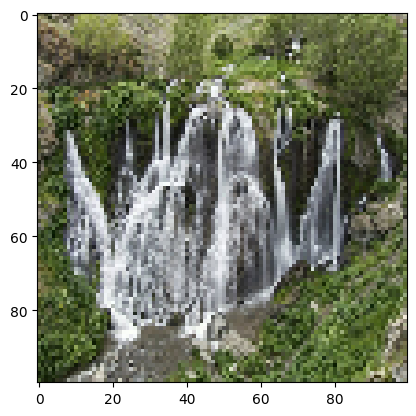

In [ ]:
plt.imshow(res[1].numpy())


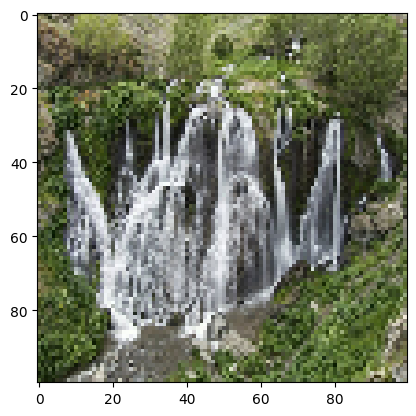

In [ ]:
plt.imshow(res[1])

In [ ]:
res[2]

1.0

In [ ]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [ ]:
inp = Input(shape=(100,100,3), name='input_image')

In [ ]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [ ]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [ ]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [ ]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [ ]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [ ]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Build Distance Layer

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
import os
import tensorflow as tf

# Define paths
ANC_PATH = 'data/anchor'
POS_PATH = 'data/positive'

# Define preprocess function
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img

# Pick sample image paths (make sure these exist in your folders)
anchor_path = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[0])
positive_path = os.path.join(POS_PATH, os.listdir(POS_PATH)[0])

# Preprocess images
anchor_img = preprocess(anchor_path)
positive_img = preprocess(positive_path)

# Expand dimensions for model prediction
anchor_img = tf.expand_dims(anchor_img, axis=0)
positive_img = tf.expand_dims(positive_img, axis=0)

# Load your embedding model here
# For example, if you have already defined and compiled it as `embedding_model`
# anchor_embedding = embedding_model(anchor_img)
# positive_embedding = embedding_model(positive_img)

# If your model is called `siamese_model`, you can also do:
# prediction = siamese_model.predict([anchor_img, positive_img])


In [ ]:
import os

# Print all filenames in the anchor and positive folders
print("Anchor images:", os.listdir('data/anchor'))
print("Positive images:", os.listdir('data/positive'))


Anchor images: ['74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg', '74ee2fe3-6b16-11f0-bf6a-ba2358a892e2.jpg', '74f2a688-6b16-11f0-af33-ba2358a892e2.jpg', '74f7ce50-6b16-11f0-8669-ba2358a892e2.jpg', '752524ba-6b16-11f0-96c7-ba2358a892e2.jpg', '75411605-6b16-11f0-859c-ba2358a892e2.jpg', '754610ad-6b16-11f0-86b9-ba2358a892e2.jpg', '7557f42a-6b16-11f0-b8fd-ba2358a892e2.jpg', '756a4c4b-6b16-11f0-9b12-ba2358a892e2.jpg', '758145e8-6b16-11f0-ba96-ba2358a892e2.jpg', '75860d4e-6b16-11f0-874b-ba2358a892e2.jpg', '75a19a1a-6b16-11f0-a245-ba2358a892e2.jpg', '75af654f-6b16-11f0-a8bf-ba2358a892e2.jpg', '75b3d22f-6b16-11f0-9f17-ba2358a892e2.jpg', '75b88f78-6b16-11f0-b314-ba2358a892e2.jpg', '75d988ad-6b16-11f0-b1d5-ba2358a892e2.jpg', '75e64cc9-6b16-11f0-aee2-ba2358a892e2.jpg', '75eb5fa7-6b16-11f0-9999-ba2358a892e2.jpg', '760c81f7-6b16-11f0-b03d-ba2358a892e2.jpg', '76193a8f-6b16-11f0-9be5-ba2358a892e2.jpg', '762d8d2c-6b16-11f0-af80-ba2358a892e2.jpg', '764757ee-6b16-11f0-b49e-ba2358a892e2.jpg', '765fb69a-6b16-1

In [ ]:
# Example: set anchor and validation image paths (replace with real filenames that exist in your folders)
anchor_path = 'data/anchor/74ea3dc3-6b16-11f0-88f6-ba2358a892e2.jpg'
validation_path = 'data/positive/sample_positive.jpg'

# Make sure the files exist!
import os
print("Anchor Exists:", os.path.isfile(anchor_path))
print("Validation Exists:", os.path.isfile(validation_path))

# Now preprocess
anchor_img = preprocess(anchor_path)
validation_img = preprocess(validation_path)


Anchor Exists: True
Validation Exists: True


In [ ]:
import tensorflow as tf

# Define custom L1 Distance layer
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


###Step-by-Step Siamese Model Creation & Training

Step 1: Define the L1 Distance Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


 Step 2: Define the Siamese Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

def make_embedding_model():
    input = Input(shape=(100, 100, 3))  # Adjust shape as per your data

    x = Conv2D(64, (10,10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4,4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)

    return Model(inputs=input, outputs=x, name="Embedding")


def make_siamese_model():
    input_img = Input(name='input_img', shape=(100, 100, 3))
    validation_img = Input(name='validation_img', shape=(100, 100, 3))

    embedding = make_embedding_model()

    input_embedding = embedding(input_img)
    validation_embedding = embedding(validation_img)

    l1_distance = L1Dist()(input_embedding, validation_embedding)
    output = Dense(1, activation='sigmoid')(l1_distance)

    return Model(inputs=[input_img, validation_img], outputs=output, name="SiameseModel")


In [ ]:
def make_siamese_model():
    input_img = Input(name='input_img', shape=(100, 100, 3))
    validation_img = Input(name='validation_img', shape=(100, 100, 3))

    embedding = make_embedding_model()

    input_embedding = embedding(input_img)
    validation_embedding = embedding(validation_img)

    l1_distance = L1Dist()(input_embedding, validation_embedding)
    output = Dense(1, activation='sigmoid')(l1_distance)

    return Model(inputs=[input_img, validation_img], outputs=output, name="SiameseModel")



🏋️ Step 3: Compile and Train

In [ ]:
siamese_model = make_siamese_model()
siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dummy training data for testing the flow
import numpy as np
X1 = np.random.rand(10, 100, 100, 3)
X2 = np.random.rand(10, 100, 100, 3)
y = np.random.randint(0, 2, 10)

# Train for 1 epoch just to create the model weights
siamese_model.fit([X1, X2], y, epochs=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3000 - loss: 0.6933


 Step 4: Save the Model
 

In [ ]:
siamese_model.save('siamese_model.h5')


✅ Now You Can Load It Later With

In [ ]:
from tensorflow.keras.models import load_model
siamese_model = load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})


In [ ]:
embedding_model = make_embedding_model()


In [ ]:
siamese_model.embedding = embedding_model  # <-- This is NOT saved by .save()


 The Correct Way: Recreate the Embedding Model Separately

✅ Step 1: Rebuild the Embedding Model

In [ ]:
def make_embedding_model():
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

    input = Input(shape=(100, 100, 3))  # Adjust to your input shape

    x = Conv2D(64, (10,10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4,4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)

    return Model(inputs=input, outputs=x, name="Embedding")


✅ Step 2: Rebuild and Copy Weights (If Needed)

In [ ]:
embedding_model = make_embedding_model()
siamese_model = make_siamese_model()

# Save both models
siamese_model.save('siamese_model.h5')
embedding_model.save('embedding_model.h5')


In [ ]:
embedding_model = load_model('embedding_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
siamese_model = load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})


In [ ]:
embedding_model = make_embedding_model()


In [ ]:
# Create a dict of name: layer from the Siamese model
siamese_layers = {layer.name: layer for layer in siamese_model.layers}

# Copy weights only for layers with matching names
for layer in embedding_model.layers:
    if layer.name in siamese_layers:
        layer.set_weights(siamese_layers[layer.name].get_weights())


In [ ]:
sample = tf.random.normal((1, 100, 100, 3))
output = embedding_model(sample)
print(output.shape)  # Should be (1, 4096) or your final embedding size


(1, 4096)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

def make_embedding_model():
    input = Input(shape=(100, 100, 3))

    x = Conv2D(64, (10,10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4,4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)

    return Model(inputs=input, outputs=x, name='embedding')


In [ ]:
def make_siamese_model(embedding_model):
    input_img = Input(name='input_img', shape=(100, 100, 3))
    validation_img = Input(name='validation_img', shape=(100, 100, 3))

    input_embedding = embedding_model(input_img)
    validation_embedding = embedding_model(validation_img)

    distance = L1Dist()(input_embedding, validation_embedding)
    output = Dense(1, activation='sigmoid')(distance)

    return Model(inputs=[input_img, validation_img], outputs=output, name='siamese_model')


In [ ]:
embedding_model = make_embedding_model()
siamese_model = make_siamese_model(embedding_model)

siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import numpy as np
X1 = np.random.rand(10, 100, 100, 3)
X2 = np.random.rand(10, 100, 100, 3)
y = np.random.randint(0, 2, 10)

siamese_model.fit([X1, X2], y, epochs=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3000 - loss: 0.6935


In [ ]:
siamese_model.save('siamese_model.h5')
embedding_model.save('embedding_model.h5')


In [ ]:
# When reloading
embedding_model = tf.keras.models.load_model('embedding_model.h5')
siamese_model = tf.keras.models.load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})


In [ ]:
# Create dict from siamese_model layers
siamese_layers = {layer.name: layer for layer in siamese_model.layers}

# Set weights by matching layer names
for layer in embedding_model.layers:
    if layer.name in siamese_layers:
        layer.set_weights(siamese_layers[layer.name].get_weights())


In [ ]:
embedding_model = make_embedding_model()

# Copy weights from layers in siamese_model to embedding_model
for i, layer in enumerate(embedding_model.layers):
    layer.set_weights(siamese_model.layers[i + 1].get_weights())  # +1 skips the input layer


ValueError: You called `set_weights(weights)` on layer 'conv2d_56' with a weight list of length 10, but the layer was expecting 2 weights.

In [ ]:
# Step 1: Rebuild the embedding model architecture
embedding_model = make_embedding_model()

# Step 2: Load the trained Siamese model (include custom layers)
siamese_model = load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})

# Step 3: Copy weights by name
siamese_layer_dict = {layer.name: layer for layer in siamese_model.layers}

for layer in embedding_model.layers:
    if layer.name in siamese_layer_dict:
        layer.set_weights(siamese_layer_dict[layer.name].get_weights())

# Test
test_input = np.random.rand(1, 100, 100, 3).astype(np.float32)
embedding = embedding_model.predict(test_input)
print("Embedding shape:", embedding.shape)  # Should be (1, 4096)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Embedding shape: (1, 4096)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Load Siamese model with custom objects
siamese_model = load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})

# Inspect the model to understand its structure
siamese_model.summary()


Model: "siamese_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 27,426,112 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_17 (L1Dist) │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │      4,097 │ l1_dist_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,430,211 (104.64 MB)

 Trainable params: 27,430,209 (104.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Replace these with the actual names from your model
embedding_input = siamese_model.input[0]  # The first image input to the Siamese network
embedding_output = siamese_model.get_layer("dense_7").output  # Replace with actual final embedding layer

# Define the embedding model
embedding_model = Model(inputs=embedding_input, outputs=embedding_output)

# Test it
import numpy as np
dummy_img = np.random.rand(1, 100, 100, 3).astype(np.float32)
embedding = embedding_model.predict(dummy_img)

print("Generated embedding shape:", embedding.shape)


ValueError: No such layer: dense_7. Existing layers are: ['input_img', 'validation_img', 'embedding', 'l1_dist_17', 'dense_15'].

In [ ]:
from tensorflow.keras.models import load_model

siamese_model = load_model('siamese_model.h5', custom_objects={'L1Dist': L1Dist, 'tf': tf})
embedding_model = siamese_model.embedding


AttributeError: 'Functional' object has no attribute 'embedding'

In [ ]:
embedding_model = siamese_model.embedding


AttributeError: 'Functional' object has no attribute 'embedding'

In [ ]:
# Example: using a trained embedding model to get feature vectors
anchor_img = preprocess(anchor_path)  # shape: (100, 100, 3)
validation_img = preprocess(validation_path)

# Add batch dimension
anchor_img = tf.expand_dims(anchor_img, axis=0)
validation_img = tf.expand_dims(validation_img, axis=0)

# Generate embeddings
anchor_embedding = embedding_model(anchor_img)              # shape: (1, embedding_dim)
validation_embedding = embedding_model(validation_img)      # shape: (1, embedding_dim)


In [ ]:
l1(anchor_embedding, validation_embedding)

<tf.Tensor: shape=(1, 4096), dtype=float32, numpy=
array([[0.00746292, 0.00641435, 0.006924  , ..., 0.00389174, 0.00711501,
        0.01309985]], dtype=float32)>

## 4.3 Make Siamese Model

In [ ]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [ ]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [ ]:
siamese_layer = L1Dist()

In [ ]:
distances = siamese_layer(inp_embedding, val_embedding)

TypeError: Exception encountered when calling L1Dist.call().

[1mCould not automatically infer the output shape / dtype of 'l1_dist_9' (of type L1Dist). Either the `L1Dist.call()` method is incorrect, or you need to implement the `L1Dist.compute_output_spec() / compute_output_shape()` method. Error encountered:

unsupported operand type(s) for -: 'list' and 'list'[0m

Arguments received by L1Dist.call():
  • args=(['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_249>'], ['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_250>'])
  • kwargs=<class 'inspect._empty'>

In [ ]:
classifier = Dense(1, activation='sigmoid')(distances)

NameError: name 'distances' is not defined

In [ ]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [ ]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_1 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [ ]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[2][0]     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()

In [ ]:
batch_1 = test_batch.next()

In [ ]:
X = batch_1[:2]

In [ ]:
y = batch_1[2]

In [ ]:
y

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

In [ ]:
tf.losses.BinaryCrossentropy??

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

## 5.4 Build Training Loop

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 9s 141ms/step

 Epoch 2/50
27/27 [==============================] - 3s 130ms/step

 Epoch 3/50
27/27 [==============================] - 3s 128ms/step

 Epoch 4/50
27/27 [==============================] - 3s 127ms/step

 Epoch 5/50
27/27 [==============================] - 3s 126ms/step

 Epoch 6/50
27/27 [==============================] - 3s 123ms/step

 Epoch 7/50
27/27 [==============================] - 3s 122ms/step

 Epoch 8/50
27/27 [==============================] - 3s 122ms/step

 Epoch 9/50
27/27 [==============================] - 3s 119ms/step

 Epoch 10/50
27/27 [==============================] - 3s 119ms/step

 Epoch 11/50
27/27 [==============================] - 3s 120ms/step

 Epoch 12/50
27/27 [==============================] - 3s 119ms/step

 Epoch 13/50
27/27 [======

# 6. Evaluate Model

## 6.1 Import Metrics

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[1.0000000e+00],
       [9.7660100e-01],
       [7.9630136e-06],
       [9.9995840e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.2488189e-06],
       [1.0000000e+00],
       [3.0321256e-05],
       [1.4018004e-06],
       [9.9435657e-01],
       [8.0274049e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.6748862e-07],
       [9.0237927e-07]], dtype=float32)

In [ ]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]

In [ ]:
y_true

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

## 6.4 Viz Results

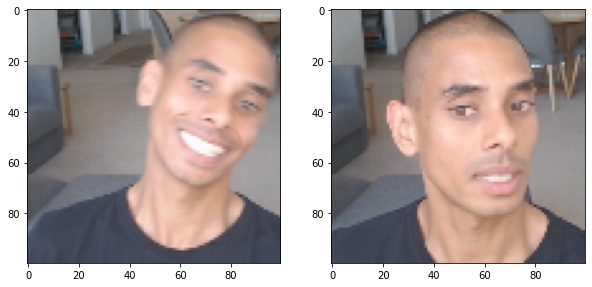

In [ ]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# 7. Save Model

In [ ]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
L1Dist

__main__.L1Dist

In [ ]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[1.0000000e+00],
       [9.7660100e-01],
       [7.9630136e-06],
       [9.9995840e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.2488189e-06],
       [1.0000000e+00],
       [3.0321256e-05],
       [1.4018004e-06],
       [9.9435657e-01],
       [8.0274049e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.6748862e-07],
       [9.0237927e-07]], dtype=float32)

In [ ]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_6 (L1Dist)              (None, 4096)         0           embedding[0][0]     

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
application_data\verification_images

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

['c01703e8-135f-11ec-9c58-a0cec8d2d278.jpg',
 'c08e1f2e-135f-11ec-ab18-a0cec8d2d278.jpg',
 'c099e9f0-135f-11ec-86a7-a0cec8d2d278.jpg',
 'c0c715c0-135f-11ec-892f-a0cec8d2d278.jpg',
 'c0ef7814-135f-11ec-904e-a0cec8d2d278.jpg',
 'c202065a-135f-11ec-b0bc-a0cec8d2d278.jpg',
 'c22117d0-135f-11ec-926e-a0cec8d2d278.jpg',
 'c268919e-135f-11ec-bd66-a0cec8d2d278.jpg',
 'c2a3a158-135f-11ec-99bc-a0cec8d2d278.jpg',
 'c2afbad2-135f-11ec-b848-a0cec8d2d278.jpg',
 'c2e6ebc6-135f-11ec-911c-a0cec8d2d278.jpg',
 'c3aedf8a-135f-11ec-8753-a0cec8d2d278.jpg',
 'c3c988f4-135f-11ec-9c57-a0cec8d2d278.jpg',
 'c3e61236-135f-11ec-98e6-a0cec8d2d278.jpg',
 'c3f6eaa4-135f-11ec-99c1-a0cec8d2d278.jpg',
 'c4bb2318-135f-11ec-8cc2-a0cec8d2d278.jpg',
 'c4e34040-135f-11ec-91be-a0cec8d2d278.jpg',
 'c5392134-135f-11ec-938a-a0cec8d2d278.jpg',
 'c708476c-135f-11ec-9833-a0cec8d2d278.jpg',
 'c735b862-135f-11ec-8fe1-a0cec8d2d278.jpg',
 'c7631e7e-135f-11ec-9e54-a0cec8d2d278.jpg',
 'c8259eba-135f-11ec-843f-a0cec8d2d278.jpg',
 'c8318e88

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\c01703e8-135f-11ec-9c58-a0cec8d2d278.jpg
application_data\verification_images\c08e1f2e-135f-11ec-ab18-a0cec8d2d278.jpg
application_data\verification_images\c099e9f0-135f-11ec-86a7-a0cec8d2d278.jpg
application_data\verification_images\c0c715c0-135f-11ec-892f-a0cec8d2d278.jpg
application_data\verification_images\c0ef7814-135f-11ec-904e-a0cec8d2d278.jpg
application_data\verification_images\c202065a-135f-11ec-b0bc-a0cec8d2d278.jpg
application_data\verification_images\c22117d0-135f-11ec-926e-a0cec8d2d278.jpg
application_data\verification_images\c268919e-135f-11ec-bd66-a0cec8d2d278.jpg
application_data\verification_images\c2a3a158-135f-11ec-99bc-a0cec8d2d278.jpg
application_data\verification_images\c2afbad2-135f-11ec-b848-a0cec8d2d278.jpg
application_data\verification_images\c2e6ebc6-135f-11ec-911c-a0cec8d2d278.jpg
application_data\verification_images\c3aedf8a-135f-11ec-8753-a0cec8d2d278.jpg
application_data\verification_images\c3c988f4-135f-11ec-9c57-a0c

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

False
True
True
False
True
True
True
True
True


In [ ]:
np.sum(np.squeeze(results) > 0.9)

32

In [ ]:
32/50

0.64